In [1]:
from CPT.CPT import *
layout = CPT()

In [2]:
layout.AVERAGE_RANGE = 4000
layout.LANDCOVER_DATA_PATH = '/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/input/landcover/g100_clc12_V18_5.tif'
layout.OUTPUT_DATA_PATH = '/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/output/'

In [3]:
layout.set_utm_zone('33T')
layout.MAX_ELEVATION_ANGLE = 7

Correct latitudinal zone!
Correct longitudinal zone!
UTM zone set


In [4]:
points = np.array([[576697, 4845753, 405 + 80],
[576968.2, 4845595, 435 + 80],
[577215, 4845425, 422 + 80],
[577439, 4845219, 427 + 80],
[577752,4845005,449 + 80],
[577979, 4844819, 477 + 80],
[578400, 4844449,454+ 80],
[578658, 4844287, 449 + 80],
[578838, 4844034, 424 + 80],
[578974, 4843842, 407 + 80],
[579121, 4844186, 412 + 80],
[579246, 4843915, 409 + 80]])

In [5]:
layout.add_measurements(measurements = points, points_type = 'misc')

Adding misc measurement points!


In [6]:
layout.generate_combined_layer(points_type = 'misc')

Generating combined layer for misc measurement points!
Topography layer generated using orography and canopy height.
Correct latitudinal zone!
Correct longitudinal zone!
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1


Lidar 1 position added!


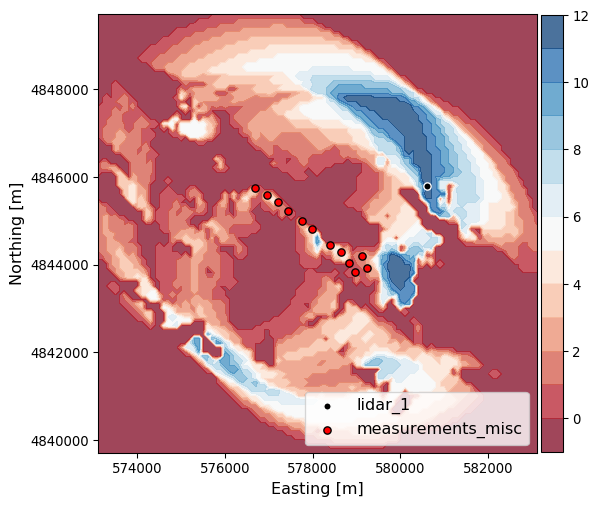

In [56]:
layout.add_lidars(lidar_pos_1 = np.array([580600,4845800, 150]))
layout.plot_layer(layout.combined_layer)

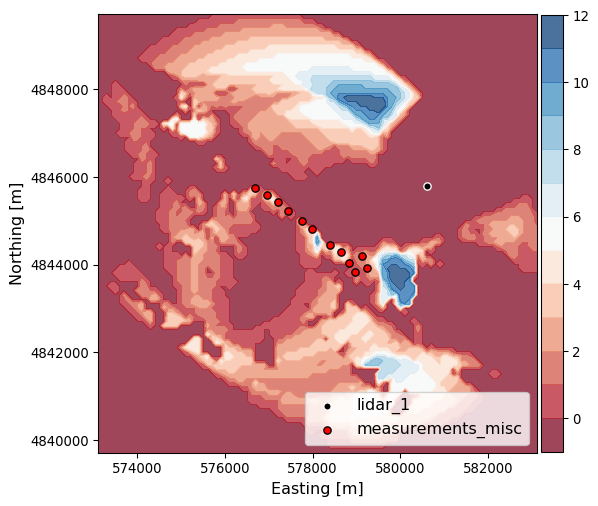

In [57]:
layout.generate_intersecting_angle_layer()
layout.plot_layer(layout.intersecting_angle_layer * layout.combined_layer)